In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.4.1/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time = [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(5,60,5)
Lon_Bins = Create_Bins(-100,20,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [9]:
# Create Function to Plot ET Begin and Complete Locations
def Plot_ET_Locs(ET_DF, Model, i):
#
# Define SLP Bound For Storm Peak, ET Begin and ET Complete
    Peak_SLP_Bound = 1000
    Begin_SLP_Bound = 1008
    Compl_SLP_Bound = 1008
#
# Plot Peak Locations
    Axis = Fig.add_subplot(3,3,3*i+1, projection=ccrs.PlateCarree())
    ET_DF_Peak = ET_DF[ET_DF["Peak SLP"] <= Peak_SLP_Bound]
    Peak_Lats = numpy.array(ET_DF_Peak["Peak Lat"])
    Peak_Lons = numpy.array(ET_DF_Peak["Peak Lon"])
    for k in range(len(Peak_Lats)):
        pyplot.scatter(Peak_Lons[k], Peak_Lats[k], marker='*', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i)
    Title = Model + ": Storm Peak Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Begin Locations
    Axis = Fig.add_subplot(3,3,3*i+2, projection=ccrs.PlateCarree())
    ET_DF_Begin = ET_DF[ET_DF["ET Begin SLP"] <= Begin_SLP_Bound]
    Begin_Lats = numpy.array(ET_DF_Begin["ET Begin Lat"])
    Begin_Lons = numpy.array(ET_DF_Begin["ET Begin Lon"])
    for k in range(len(Begin_Lats)):
        pyplot.scatter(Begin_Lons[k], Begin_Lats[k], marker='s', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+1)
    Title = Model + ": ET Initiation Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Complete Data
    Axis = Fig.add_subplot(3,3,3*i+3, projection=ccrs.PlateCarree())
    ET_DF_Compl = ET_DF[ET_DF["ET Complete SLP"] <= Compl_SLP_Bound]
    Compl_Lats = numpy.array(ET_DF_Compl["ET Complete Lat"])
    Compl_Lons = numpy.array(ET_DF_Compl["ET Complete Lon"])
    for k in range(len(Compl_Lats)):
        pyplot.scatter(Compl_Lons[k], Compl_Lats[k], marker='^', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+2)
    Title = Model + ": ET Completion Locations"
    Axis.set_title(Title, fontsize=24)

In [10]:
def Plot_Map_Formatting(Axis, Plot):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min, x_Max, y_Min, y_Max = -100, 10, 5, 60
    x_Axis = Create_Bins(x_Min, x_Max, 5)
    y_Axis = Create_Bins(y_Min, y_Max, 5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    Letter_Label(Axis, Plot)

In [11]:
# Create Function to Calculate ET Locations Spatial Distribution
def ET_Locs_Distr(ET_DF, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model):
    Count_Sum = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    ET_DF_Var = ET_DF[(ET_DF[Var+" SLP"] <= SLP_Up_Bound) & (ET_DF[Var+" SLP"] > SLP_Low_Bound)]
    Length = len(ET_DF_Var)
    Lats = numpy.array(ET_DF_Var[Var+" Lat"])
    Lons = numpy.array(ET_DF_Var[Var+" Lon"])
#
# Count ET Locations Distribution
    Params_Lat = Create_Bins(0,5,1.25)
    Params_Lon = Create_Bins(0,5,1.25)
    for m in range(len(Params_Lat)):
        for n in range(len(Params_Lat)):
            Count = ET_Loc_Count(Lats, Lons, Lat_Bins, Lon_Bins, Params_Lat[m], Params_Lon[n])
            Count_Sum += Count
    Count_Mean = Count_Sum / (len(Params_Lat) * len(Params_Lon))
#
# Calculate ET Locations Density
    Density = Count_Mean / Length * 1000
    return (Density)

In [12]:
# Count ET Locations Distribution
def ET_Loc_Count(Lats, Lons, Lat_Bins, Lon_Bins, Param_Lat, Param_Lon):
    Lat_Lon_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Lat_Lon_Length = 0
#
# Count Lat Lon Distribution in Each Gridbox
    for i in range(len(Lats)):
        for j in range(len(Lat_Bins)-1):
            if Lats[i] >= Lat_Bins[j]-Param_Lat and Lats[i] <= Lat_Bins[j+1]+Param_Lat:
                for k in range(len(Lon_Bins)-1):
                    if Lons[i] >= Lon_Bins[k]-Param_Lon and Lons[i] <= Lon_Bins[k+1]+Param_Lon:
                        Lat_Lon_Count[j][k] += 1
                        Lat_Lon_Length += 1
    Lat_Lon_Final = Lat_Lon_Count / Lat_Lon_Length * len(Lats)
    return (Lat_Lon_Final)

In [13]:
# Create Function to Plot ET Begin and Complete Locations
def ET_Distr_Plot(ET_DF, Model, i, Bounds, Colours, Colourbar):
# Use Function to Calculate Distributions
    Spatial_Genesis = ET_Locs_Distr(ET_DF, "Genesis", 1030, 1003, Lat_Bins, Lon_Bins, Model)
    Spatial_Begin = ET_Locs_Distr(ET_DF, "ET Begin", 1008, 850, Lat_Bins, Lon_Bins, Model)
    Spatial_Compl = ET_Locs_Distr(ET_DF, "ET Complete", 1008, 850, Lat_Bins, Lon_Bins, Model)
#
# Plot Genesis Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Genesis)):
        for k in range(len(Spatial_Genesis[0])):
            Colour = Spatial_Colour(Spatial_Genesis[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3)
    Title = Model + ": Genesis Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Plot ET Begin Distrbution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Begin)):
        for k in range(len(Spatial_Begin[0])):
            Colour = Spatial_Colour(Spatial_Begin[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1)
    Title = Model + ": ET Initiation Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
        Cax = Axis.inset_axes([0.1, -0.14, 0.8, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot ET Complete Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Compl)):
        for k in range(len(Spatial_Compl[0])):
            Colour = Spatial_Colour(Spatial_Compl[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2)
    Title = Model + ": ET Completion Distribution"
    Axis.set_title(Title, fontsize=20)

In [14]:
# Calculate Difference Between Models
def ET_Locs_Diff(ET_DF_1, ET_DF_2, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model_1, Model_2):
    Density_1 = ET_Locs_Distr(ET_DF_1, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model_1)
    Density_2 = ET_Locs_Distr(ET_DF_2, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model_2)
    Diff = Density_1 - Density_2
    return (Diff)

In [15]:
# Create Function to Plot ET Begin and Complete Locations
def ET_Diff_Plot(ET_DF_1, ET_DF_2, Model_1, Model_2, i, Bounds, Colours, Colourbar):
# Use Function to Calculate Distributions
    Diff_Genesis = ET_Locs_Diff(ET_DF_1, ET_DF_2, "Genesis", 1020, 1000, Lat_Bins, Lon_Bins, Model_1, Model_2)
    Diff_Begin = ET_Locs_Diff(ET_DF_1, ET_DF_2, "ET Begin", 1008, 850, Lat_Bins, Lon_Bins, Model_1, Model_2)
    Diff_Compl = ET_Locs_Diff(ET_DF_1, ET_DF_2, "ET Complete", 1008, 850, Lat_Bins, Lon_Bins, Model_1, Model_2)
#
# Plot Genesis Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Diff_Genesis)):
        for k in range(len(Diff_Genesis[0])):
            Colour = Spatial_Diff_Colour(Diff_Genesis[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3)
    Title = Model_1 + " - " + Model_2 + ": Diff in Genesis Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Plot ET Begin Distrbution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Diff_Begin)):
        for k in range(len(Diff_Begin[0])):
            Colour = Spatial_Diff_Colour(Diff_Begin[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1)
    Title = Model_1 + " - " + Model_2 + ": Diff in ET Initiation Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency Diff (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
        Cax = Axis.inset_axes([0.1, -0.14, 0.8, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot ET Complete Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Diff_Compl)):
        for k in range(len(Diff_Compl[0])):
            Colour = Spatial_Diff_Colour(Diff_Compl[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2)
    Title = Model_1 + " - " + Model_2 + ": Diff in ET Completion Distribution"
    Axis.set_title(Title, fontsize=20)

In [16]:
# Create Subsets For Storm Phase Cumulative Distributions
def Phase_Subsets(Data):
    Subset_0 = Data[Data["SLP(hPa)"] <= 1008].reset_index()
    Subset_Trop = Subset_0[Subset_0["Storm Phase"] == "Tropical"]
    Subset_Trans = Subset_0[Subset_0["Storm Phase"] == "Transition"]
    Subset_Extra = Subset_0[Subset_0["Storm Phase"] == "Extratropical"]
    return (Subset_0, Subset_Trop, Subset_Trans, Subset_Extra)

In [17]:
# Create Function to Calculate ET Locations Spatial Distribution
def Phase_Locs_Distr(Data_DF, Lat_Bins, Lon_Bins, Model):
# Create Subsets Based on Phase
    Subset_0, Subset_Trop, Subset_Trans, Subset_Extra = Phase_Subsets(Data_DF)
#
# Tropical
    Trop_Count_Sum = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Trop_Length = len(Subset_Trop)
    Trop_Lats = numpy.array(Subset_Trop["Lat"])
    Trop_Lons = numpy.array(Subset_Trop["Lon"])
# Transitioning
    Trans_Count_Sum = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Trans_Length = len(Subset_Trans)
    Trans_Lats = numpy.array(Subset_Trans["Lat"])
    Trans_Lons = numpy.array(Subset_Trans["Lon"])
# Extratropical
    Extra_Count_Sum = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Extra_Length = len(Subset_Extra)
    Extra_Lats = numpy.array(Subset_Extra["Lat"])
    Extra_Lons = numpy.array(Subset_Extra["Lon"])
#
# Count ET Locations Distribution
    Params_Lat = Create_Bins(0,5,1.25)
    Params_Lon = Create_Bins(0,5,1.25)
    for m in range(len(Params_Lat)):
        for n in range(len(Params_Lat)):
            Trop_Count = ET_Loc_Count(Trop_Lats, Trop_Lons, Lat_Bins, Lon_Bins, Params_Lat[m], Params_Lon[n])
            Trans_Count = ET_Loc_Count(Trans_Lats, Trans_Lons, Lat_Bins, Lon_Bins, Params_Lat[m], Params_Lon[n])
            Extra_Count = ET_Loc_Count(Extra_Lats, Extra_Lons, Lat_Bins, Lon_Bins, Params_Lat[m], Params_Lon[n])
            Trop_Count_Sum += Trop_Count
            Trans_Count_Sum += Trans_Count
            Extra_Count_Sum += Extra_Count
    Trop_Count_Mean = Trop_Count_Sum / (len(Params_Lat) * len(Params_Lon))
    Trans_Count_Mean = Trans_Count_Sum / (len(Params_Lat) * len(Params_Lon))
    Extra_Count_Mean = Extra_Count_Sum / (len(Params_Lat) * len(Params_Lon))
#
# Calculate ET Locations Density
    Trop_Density = Trop_Count_Mean / Trop_Length * 1000
    Trans_Density = Trans_Count_Mean / Trans_Length * 1000
    Extra_Density = Extra_Count_Mean / Extra_Length * 1000
    return (Trop_Density, Trans_Density, Extra_Density)

In [18]:
# Create Function to Plot Storm Locations Based on Phase
def Phase_Distr_Plot(Data_DF, Model, i, Bounds, Colours, Colourbar):
# Use Function to Calculate Distributions
    Spatial_Trop, Spatial_Trans, Spatial_Extra = Phase_Locs_Distr(Data_DF, Lat_Bins, Lon_Bins, Model)
#
# Plot Tropical Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Trop)):
        for k in range(len(Spatial_Trop[0])):
            Colour = Spatial_Colour(Spatial_Trop[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3)
    Title = Model + ": Tropical Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Plot Transitioning Distrbution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Trans)):
        for k in range(len(Spatial_Trans[0])):
            Colour = Spatial_Colour(Spatial_Trans[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1)
    Title = Model + ": Transitioning Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
        Cax = Axis.inset_axes([0.1, -0.14, 0.8, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot Extratropical Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Extra)):
        for k in range(len(Spatial_Extra[0])):
            Colour = Spatial_Colour(Spatial_Extra[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2)
    Title = Model + ": Extratropical Track Density"
    Axis.set_title(Title, fontsize=20)

In [19]:
# Calculate Difference Between Models
def Phase_Locs_Diff(DF_1, DF_2, Model_1, Model_2):
    Trop_1, Trans_1, Extra_1 = Phase_Locs_Distr(DF_1, Lat_Bins, Lon_Bins, Model_1)
    Trop_2, Trans_2, Extra_2 = Phase_Locs_Distr(DF_2, Lat_Bins, Lon_Bins, Model_2)
    Trop_Diff = Trop_1 - Trop_2
    Trans_Diff = Trans_1 - Trans_2
    Extra_Diff = Extra_1 - Extra_2
    return (Trop_Diff, Trans_Diff, Extra_Diff)

In [20]:
# Create Function to Plot ET Begin and Complete Locations
def Phase_Diff_Plot(Data_DF_1, Data_DF_2, Model_1, Model_2, i, Bounds, Colours, Colourbar):
    Trop_Diff, Trans_Diff, Extra_Diff = Phase_Locs_Diff(Data_DF_1, Data_DF_2, Model_1, Model_2)
#
# Plot Tropical Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Trop_Diff)):
        for k in range(len(Trop_Diff[0])):
            Colour = Spatial_Diff_Colour(Trop_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3)
    Title = Model_1 + " - " + Model_2 + ": Diff in Tropical Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Plot Transitioning Distribution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Trans_Diff)):
        for k in range(len(Trans_Diff[0])):
            Colour = Spatial_Diff_Colour(Trans_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1)
    Title = Model_1 + " - " + Model_2 + ": Diff in Transitioning Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency Diff (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
        Cax = Axis.inset_axes([0.1, -0.14, 0.8, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot Extratropical Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Extra_Diff)):
        for k in range(len(Extra_Diff[0])):
            Colour = Spatial_Diff_Colour(Extra_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2)
    Title = Model_1 + " - " + Model_2 + ": Diff in Extratropical Track Density"
    Axis.set_title(Title, fontsize=20)

In [21]:
# Create Function For ET Spatial Distribution Count Colours
Spatial_Colours = ['lightskyblue', 'deepskyblue', 'limegreen', 'greenyellow', 'yellow', 'orange', 'red']
Spatial_Bounds = numpy.array([0,5,10,15,20,25,30])
#
def Spatial_Colour(Density, Bounds, Colours):
    for k in range(len(Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            Bin = numpy.digitize(Density, bins=Bounds[1:], right=True)
            Colour = Colours[Bin]
    return (Colour)

In [22]:
# Create Function of Colours of ET Locations Difference Plots
Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'red']
Diff_Bounds = numpy.array([-12,-8,-5,-2.5,2.5,5,8,12])
#
def Spatial_Diff_Colour(Diff, Bounds, Colours):
    for k in range(len(Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            Bin = numpy.digitize(Diff, bins=Bounds, right=True)
            Colour = Colours[Bin]
    return (Colour)

In [23]:
# Letter Labels
def Letter_Label(Axis, Plot):
    Fig_Labels = ['(a)','(b)','(c)','(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']
    Axis.text(0.03, 0.92, str(Fig_Labels[int(Plot)]), ha='center', va='center', \
    transform=Axis.transAxes, fontdict={'size':24},color='black')

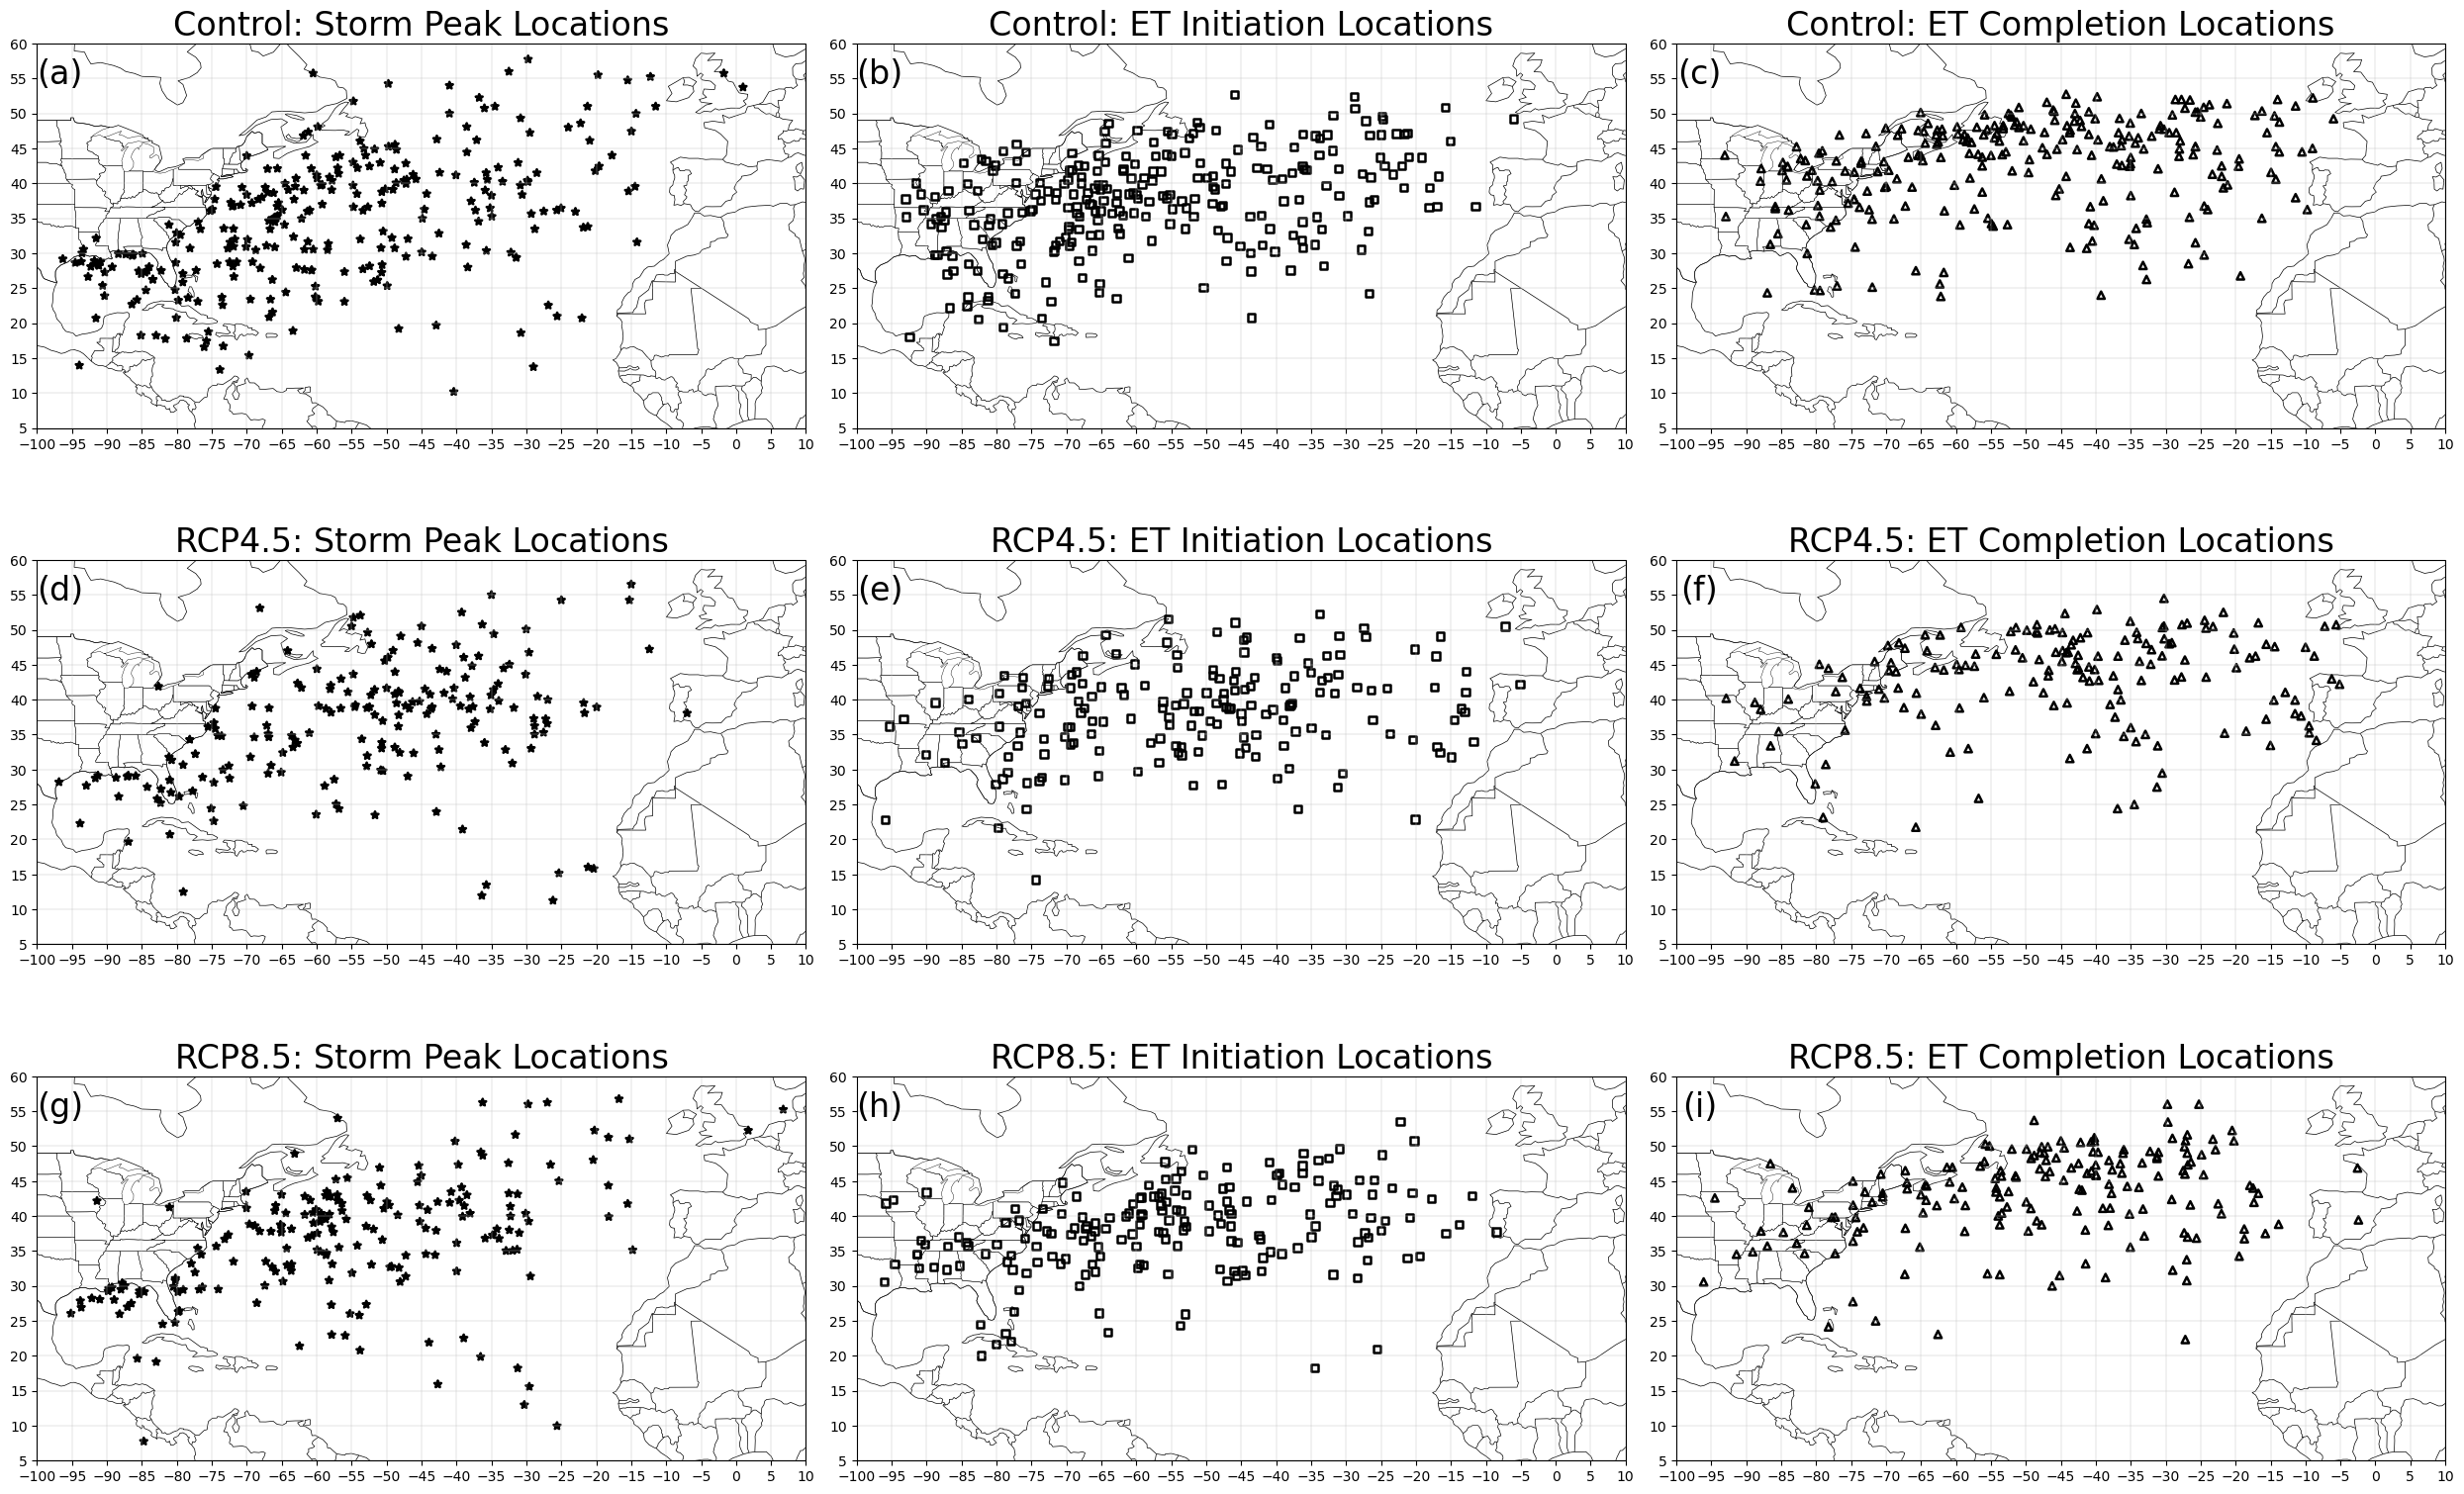

In [24]:
# Plot Storm Peak, ET Initiation and ET Completion Locations
Fig = pyplot.figure(figsize=(25,16))
Plot_ET_Locs(Control_ET, "Control", 0)
Plot_ET_Locs(RCP45_ET, "RCP4.5", 1)
Plot_ET_Locs(RCP85_ET, "RCP8.5", 2)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Loc.png', bbox_inches='tight')

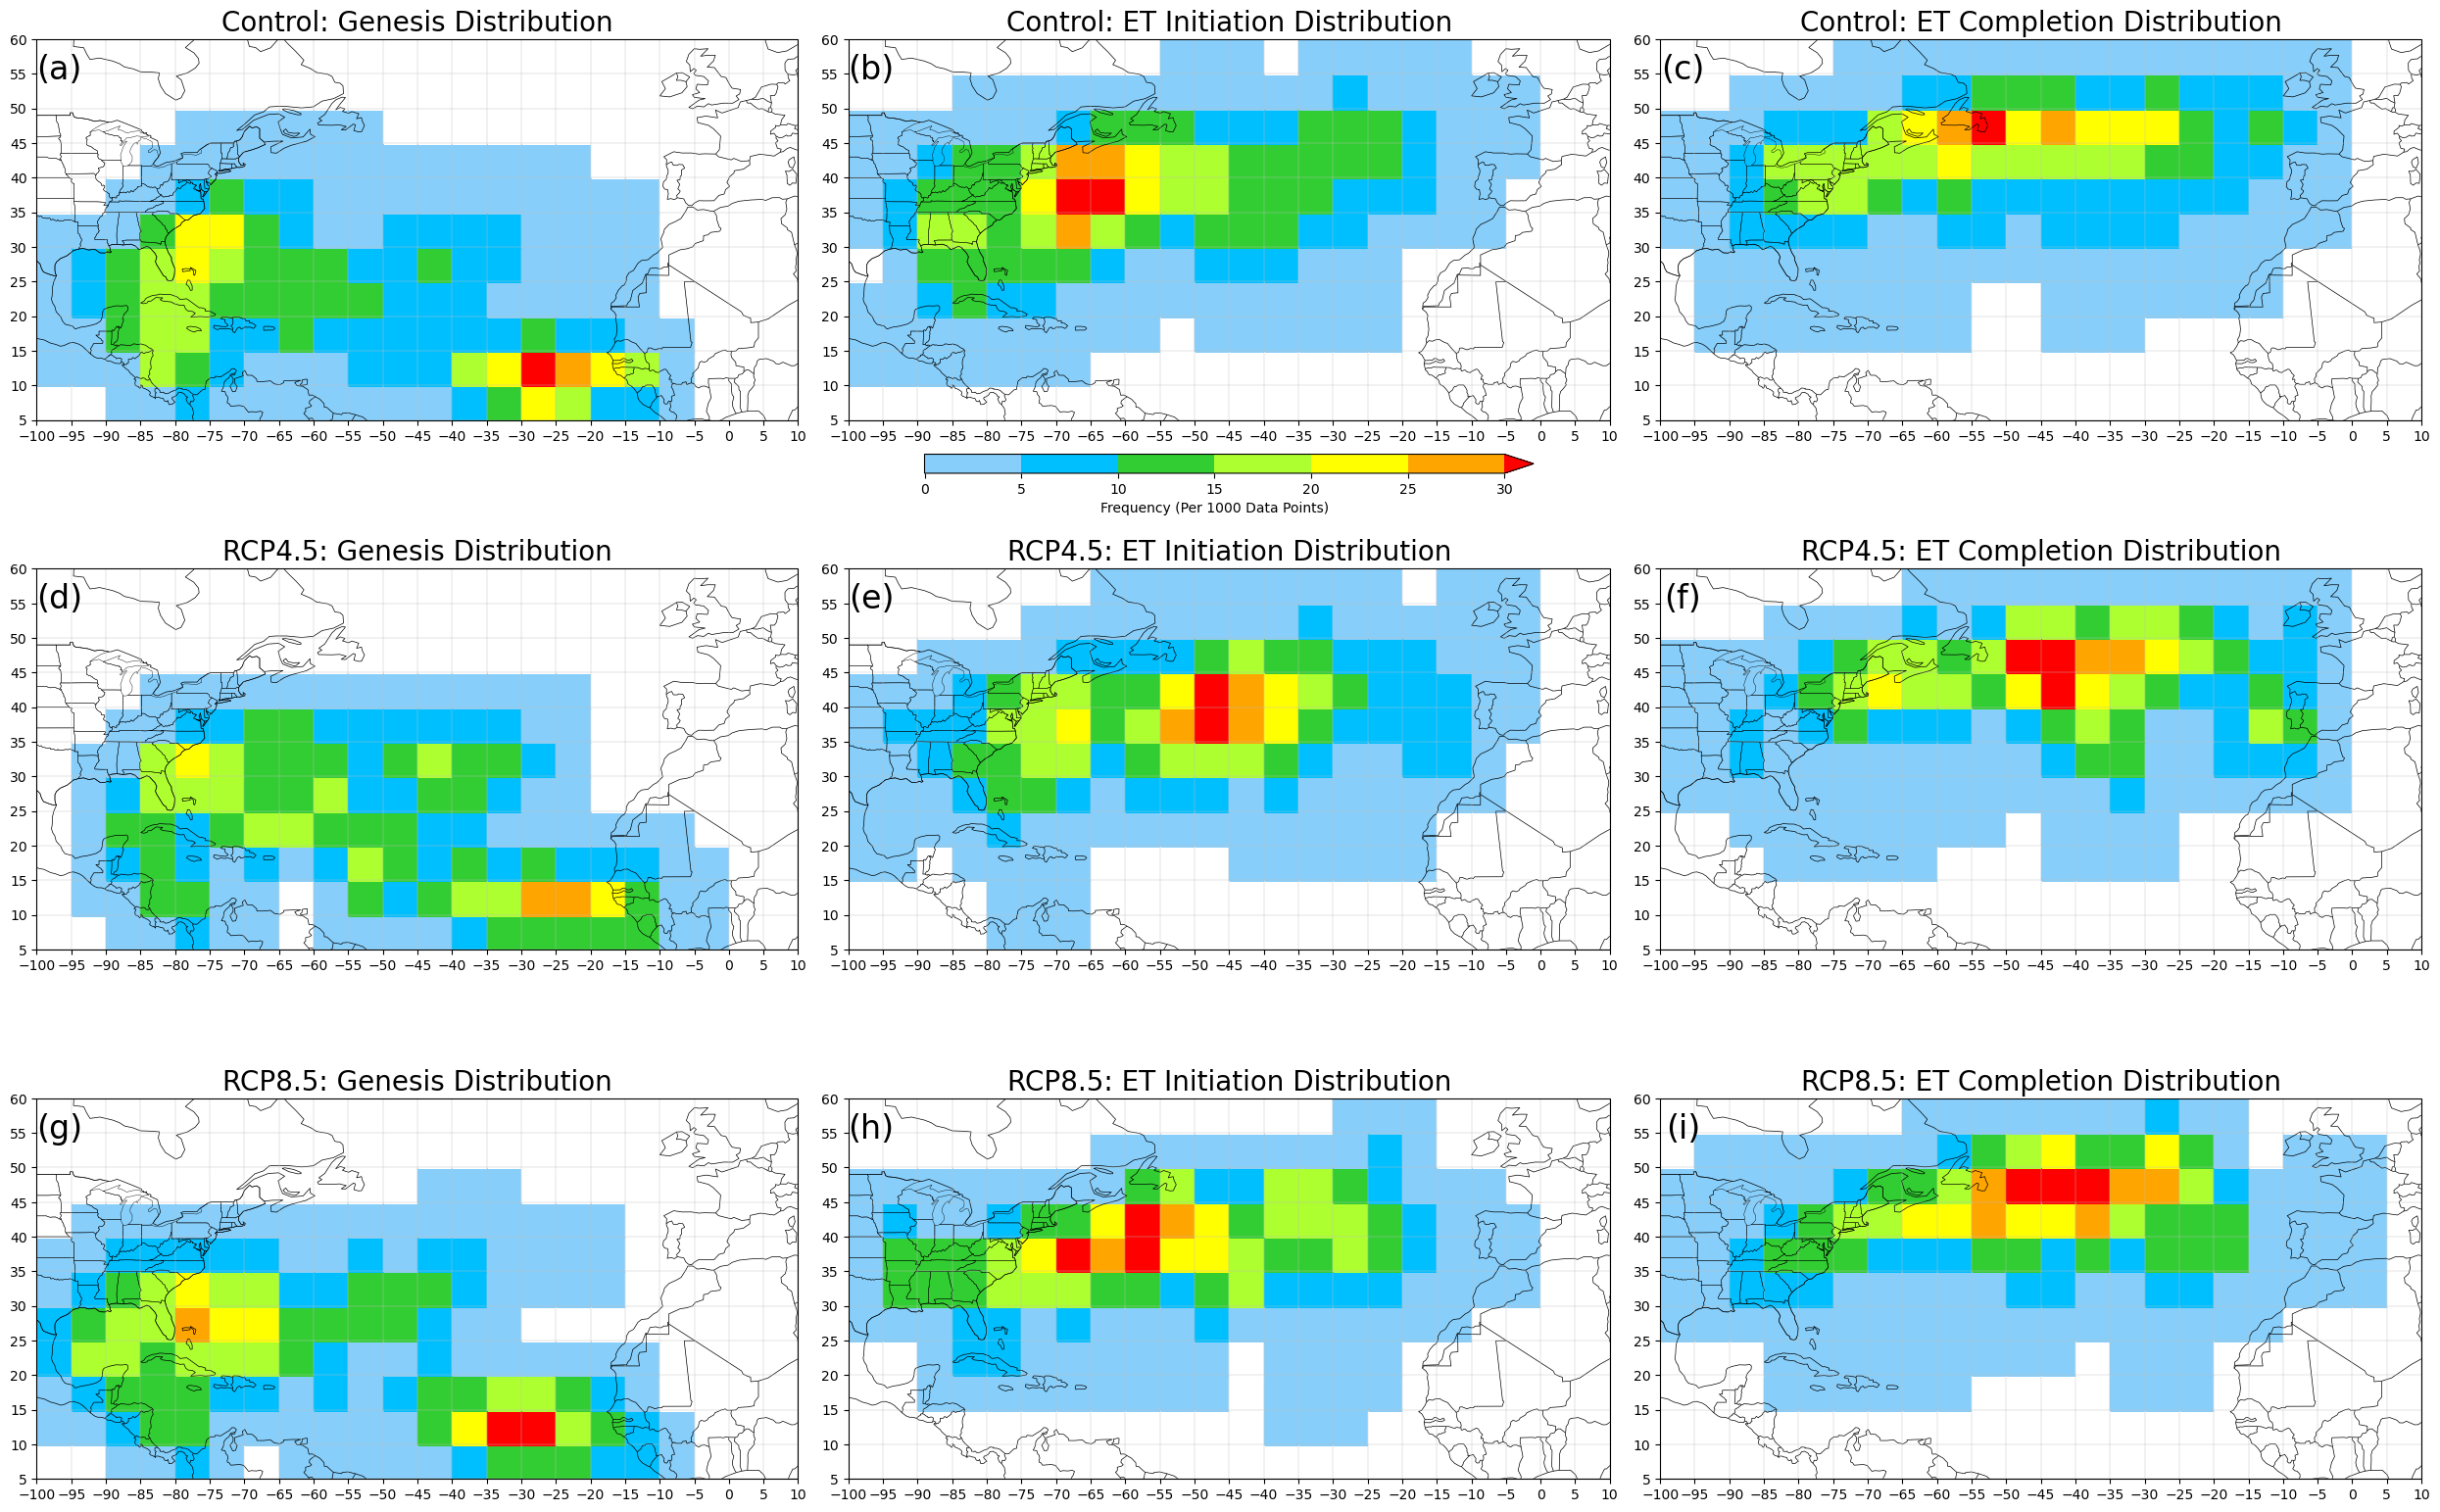

In [25]:
# Plot ET Initiation and Completion Spatial Distributions
Fig = pyplot.figure(figsize=(25,16))
ET_Distr_Plot(Control_ET, "Control", 0, Spatial_Bounds, Spatial_Colours, True)
ET_Distr_Plot(RCP45_ET, "RCP4.5", 1, Spatial_Bounds, Spatial_Colours, False)
ET_Distr_Plot(RCP85_ET, "RCP8.5", 2, Spatial_Bounds, Spatial_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Distr.png', bbox_inches='tight')

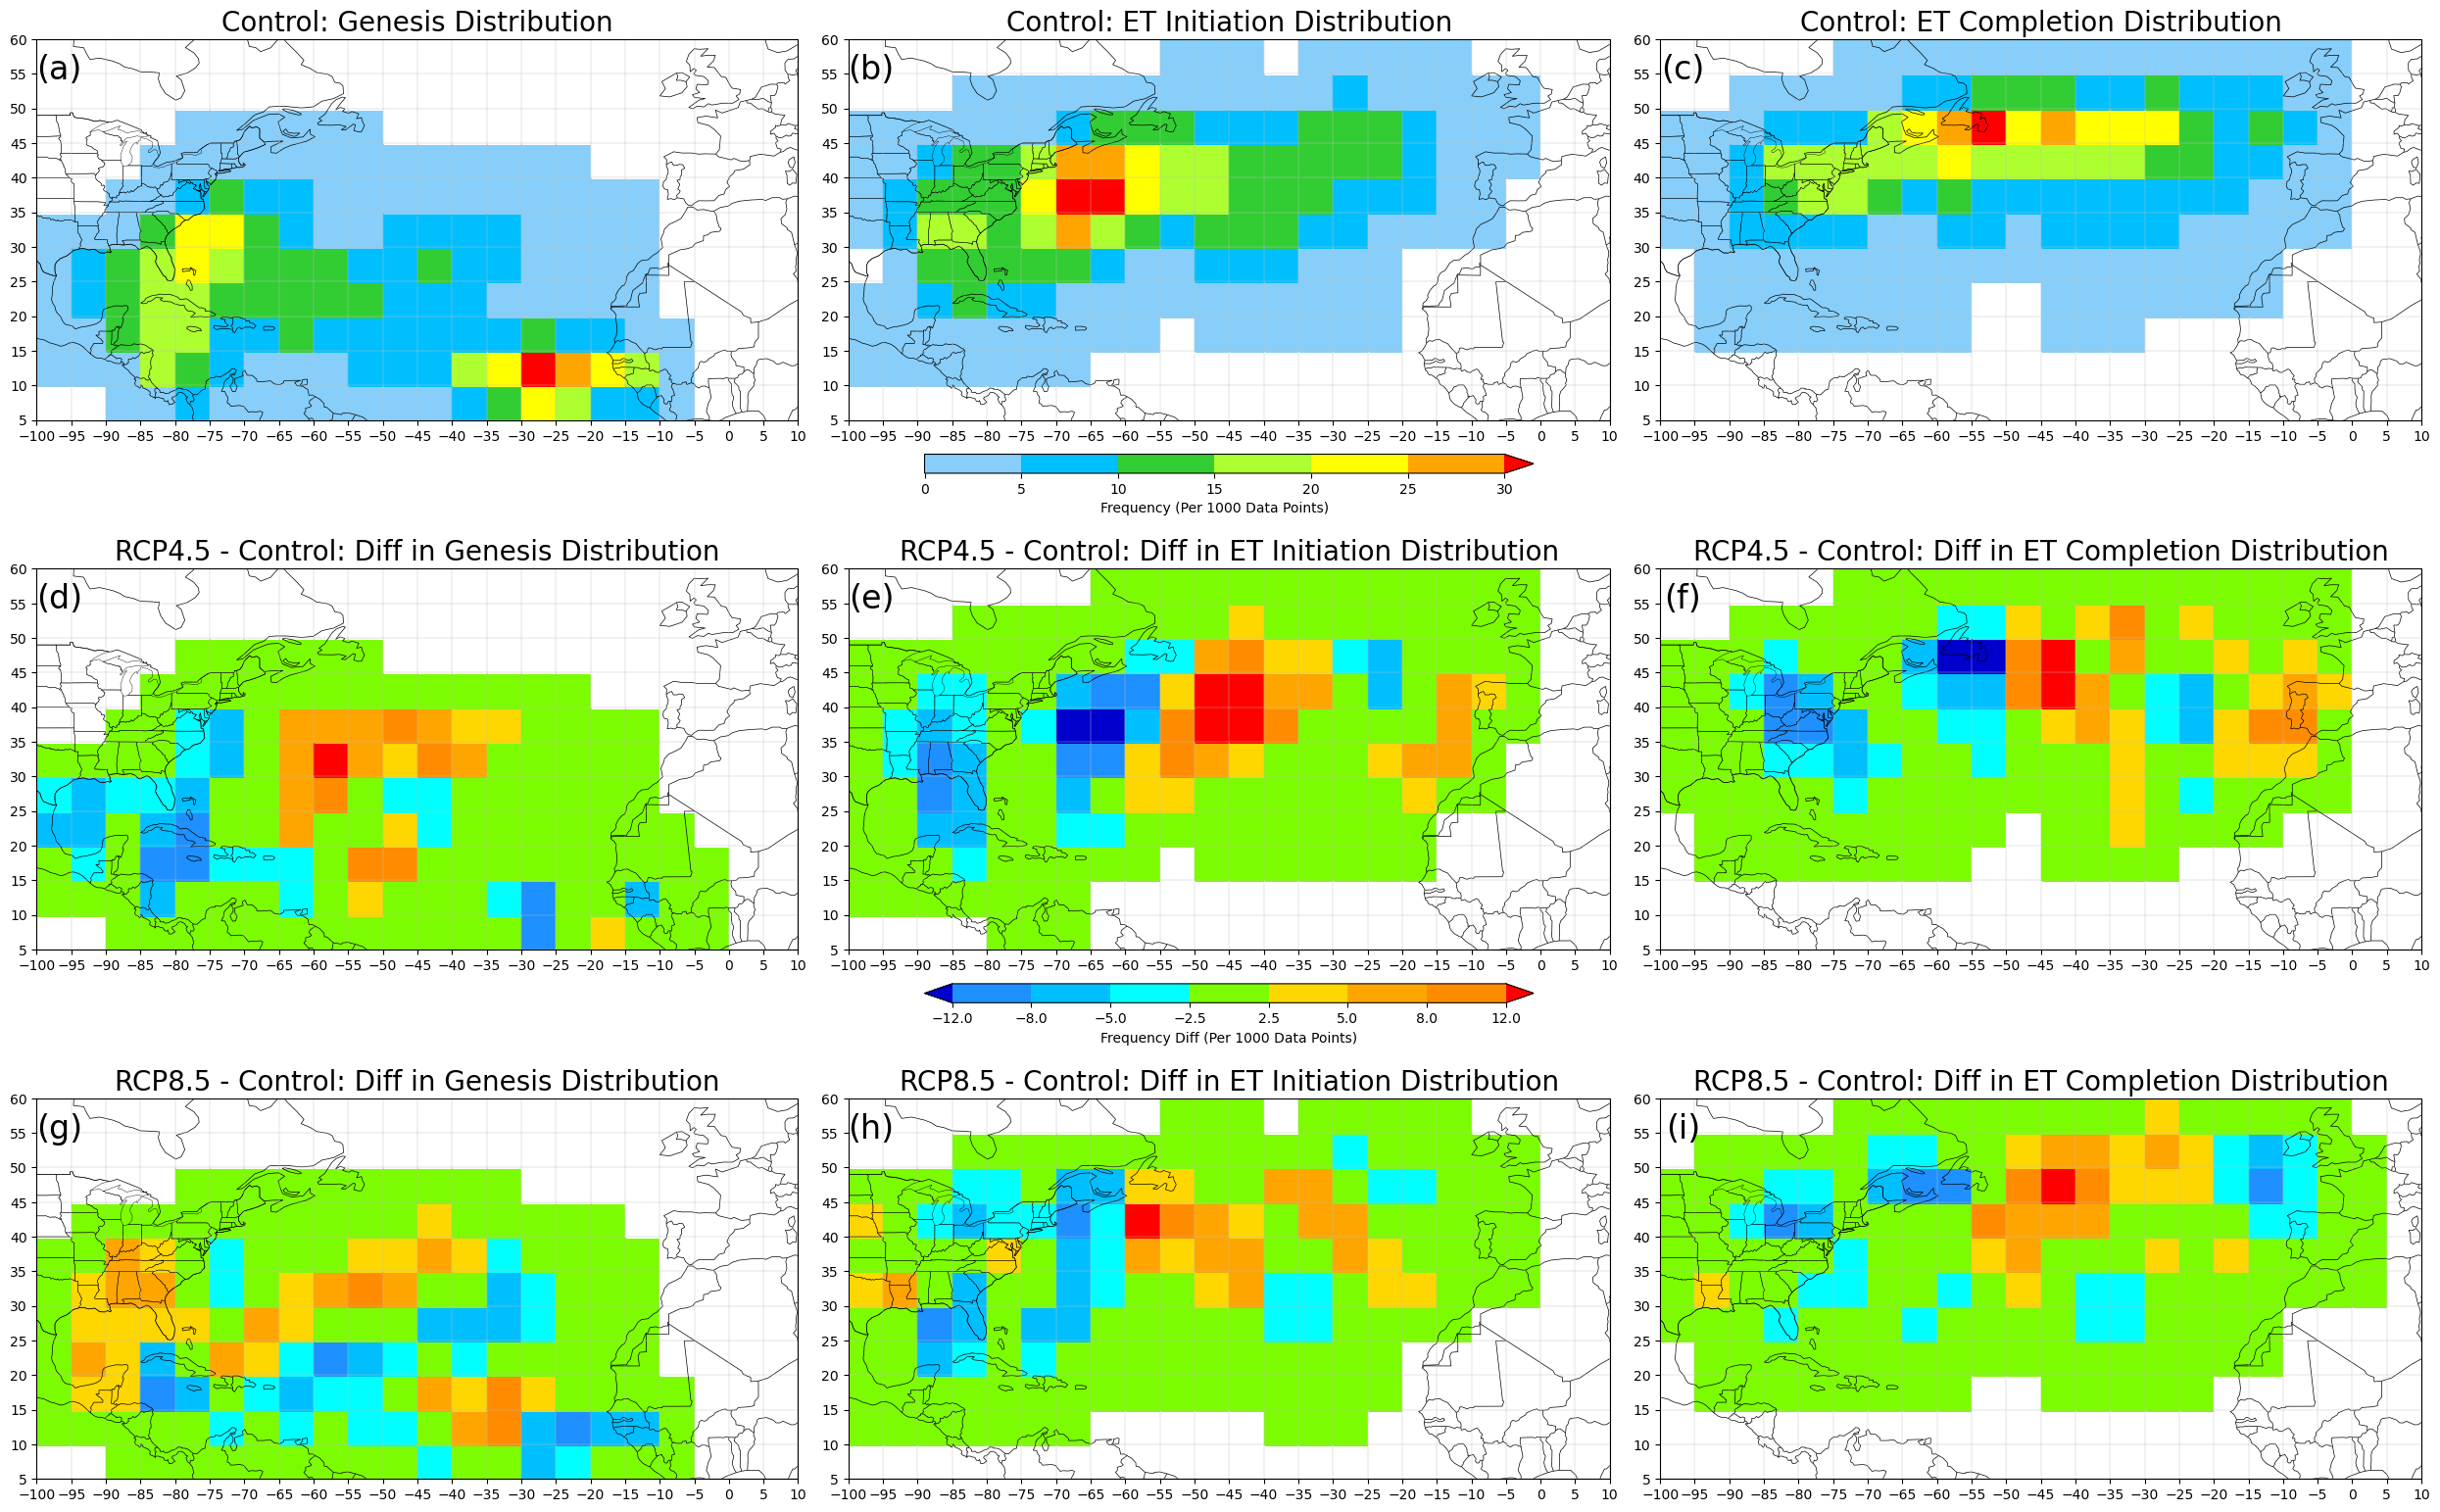

In [26]:
# Plot Differences Between ET Initiation and Completion Spatial Distributions
Fig = pyplot.figure(figsize=(25,16))
ET_Distr_Plot(Control_ET, "Control", 0, Spatial_Bounds, Spatial_Colours, True)
ET_Diff_Plot(RCP45_ET, Control_ET, "RCP4.5", "Control", 1, Diff_Bounds, Diff_Colours, True)
ET_Diff_Plot(RCP85_ET, Control_ET, "RCP8.5", "Control", 2, Diff_Bounds, Diff_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Diff.png', bbox_inches='tight')

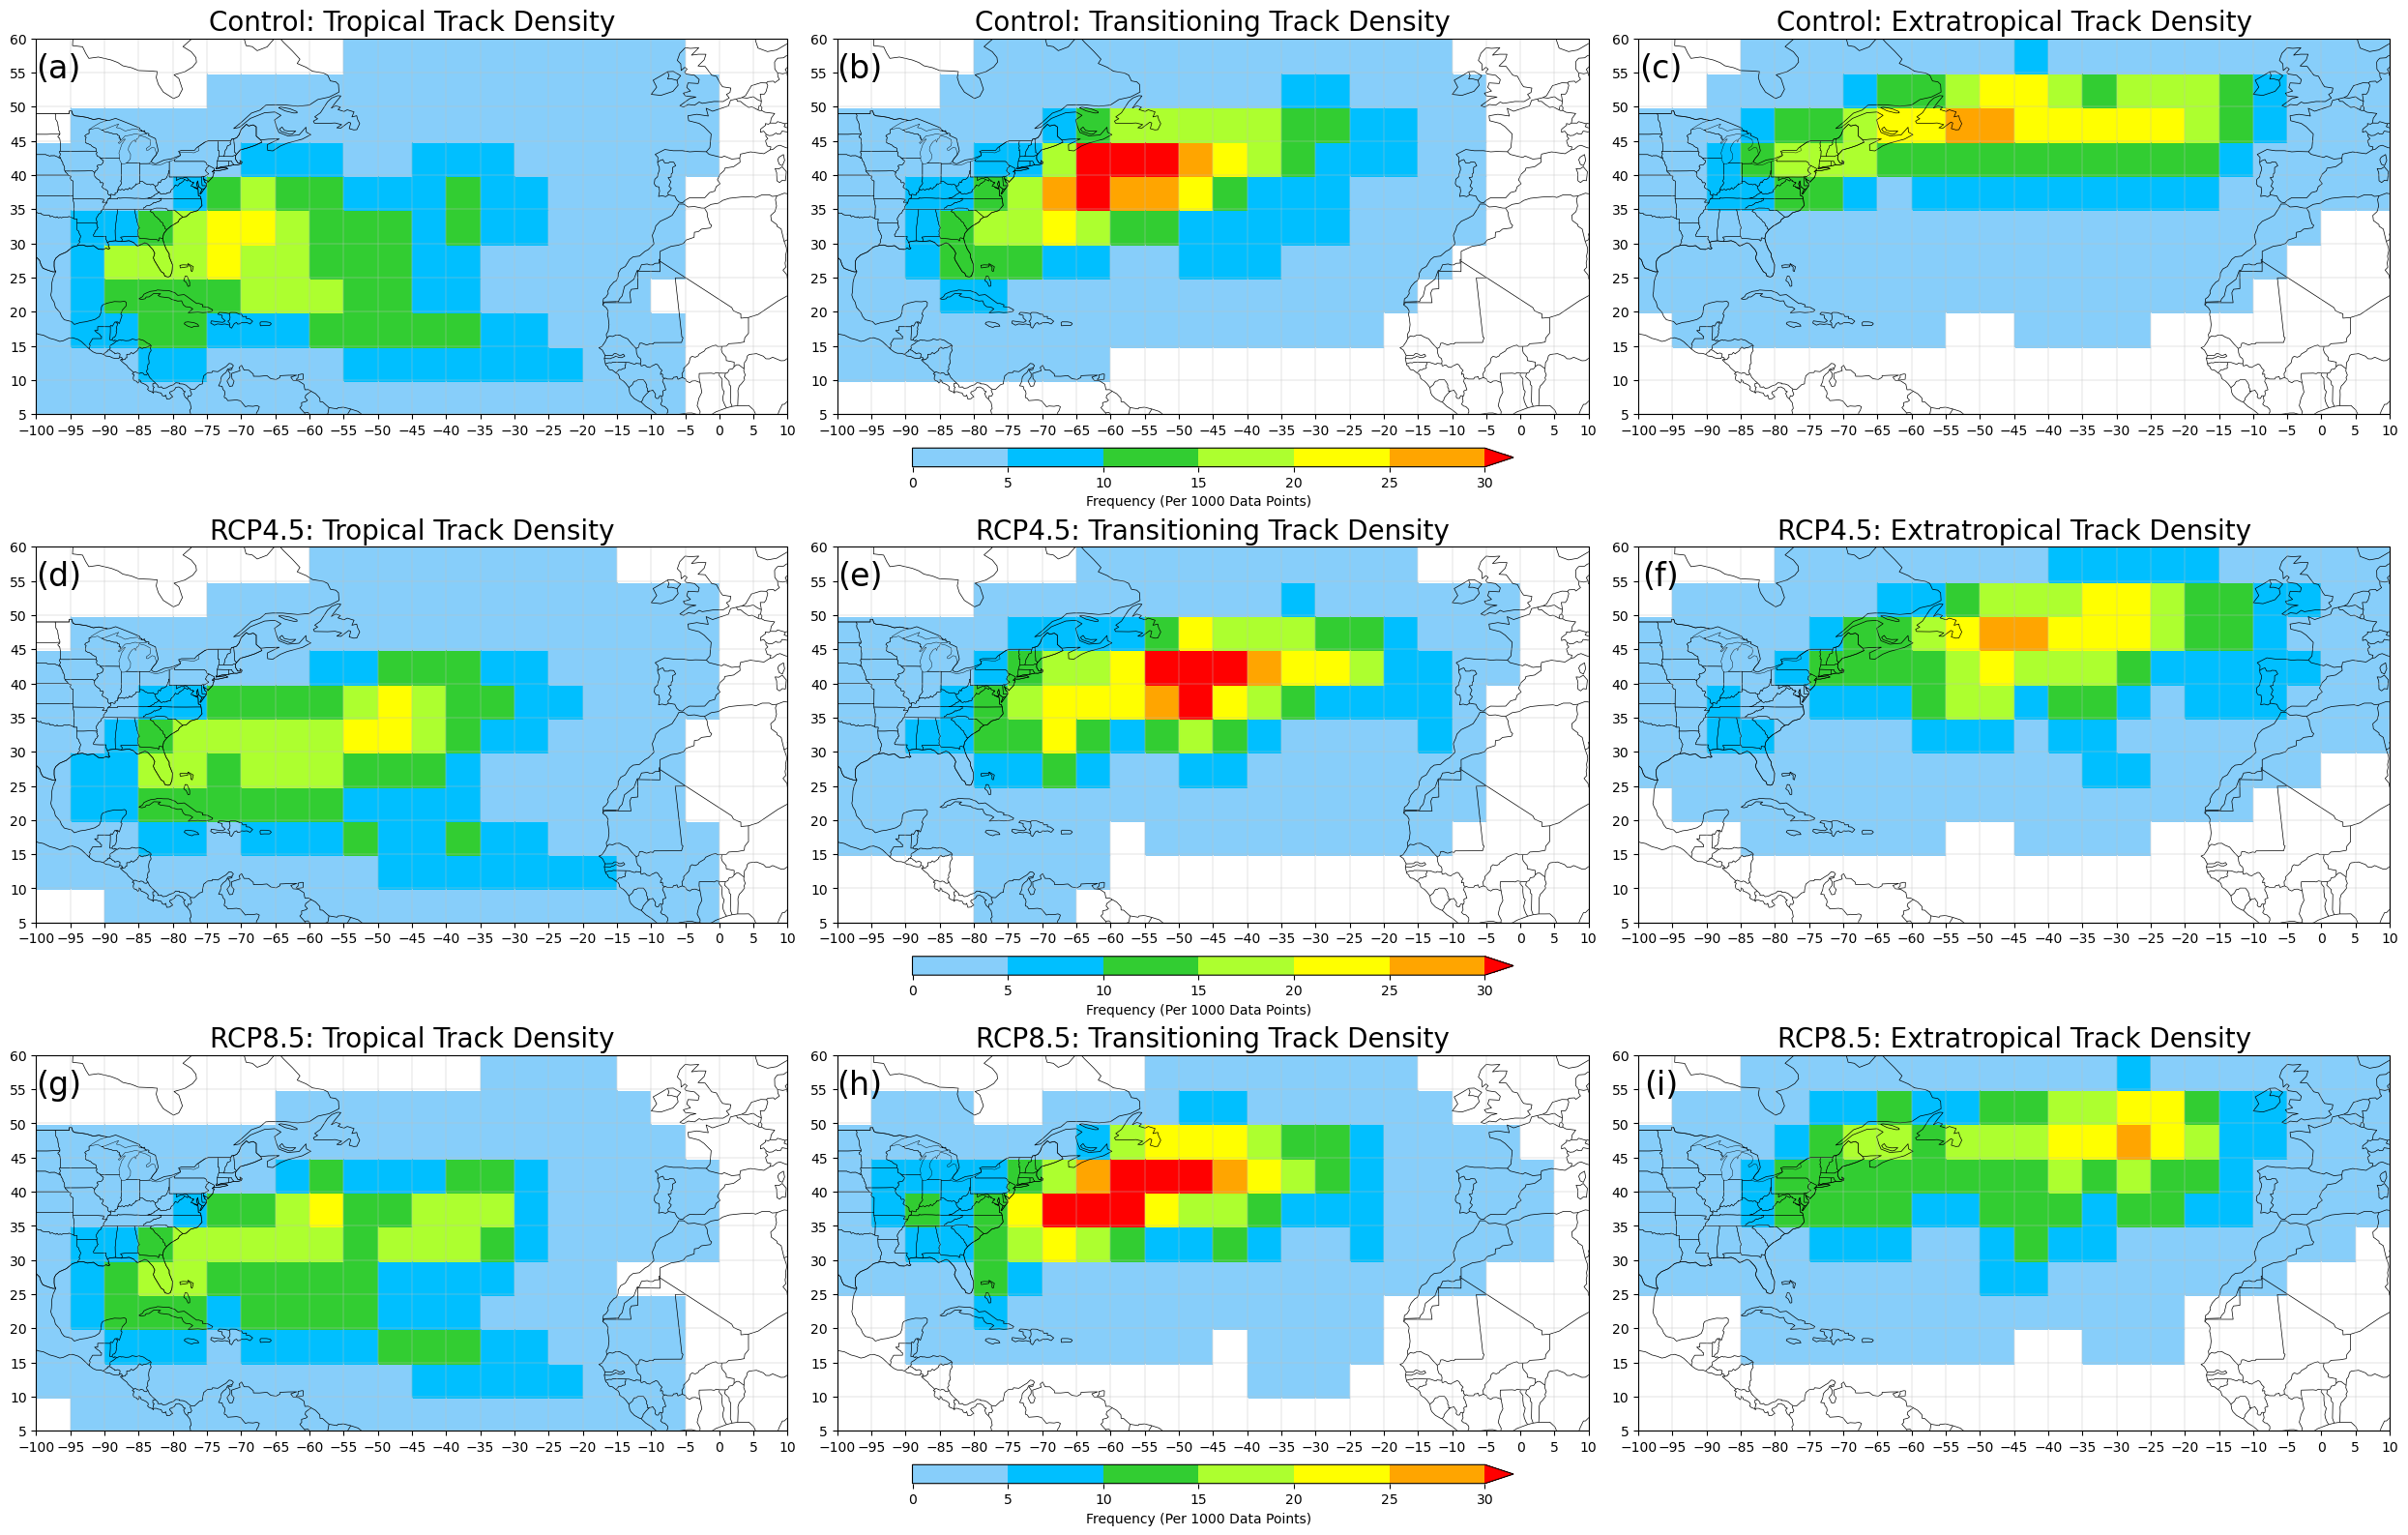

In [27]:
# Plot Spatial Distributions By Storm Phase
Fig = pyplot.figure(figsize=(25,16))
Phase_Distr_Plot(Control_Data, "Control", 0, Spatial_Bounds, Spatial_Colours, True)
Phase_Distr_Plot(RCP45_Data, "RCP4.5", 1, Spatial_Bounds, Spatial_Colours, True)
Phase_Distr_Plot(RCP85_Data, "RCP8.5", 2, Spatial_Bounds, Spatial_Colours, True)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Phase_Distr.png', bbox_inches='tight')

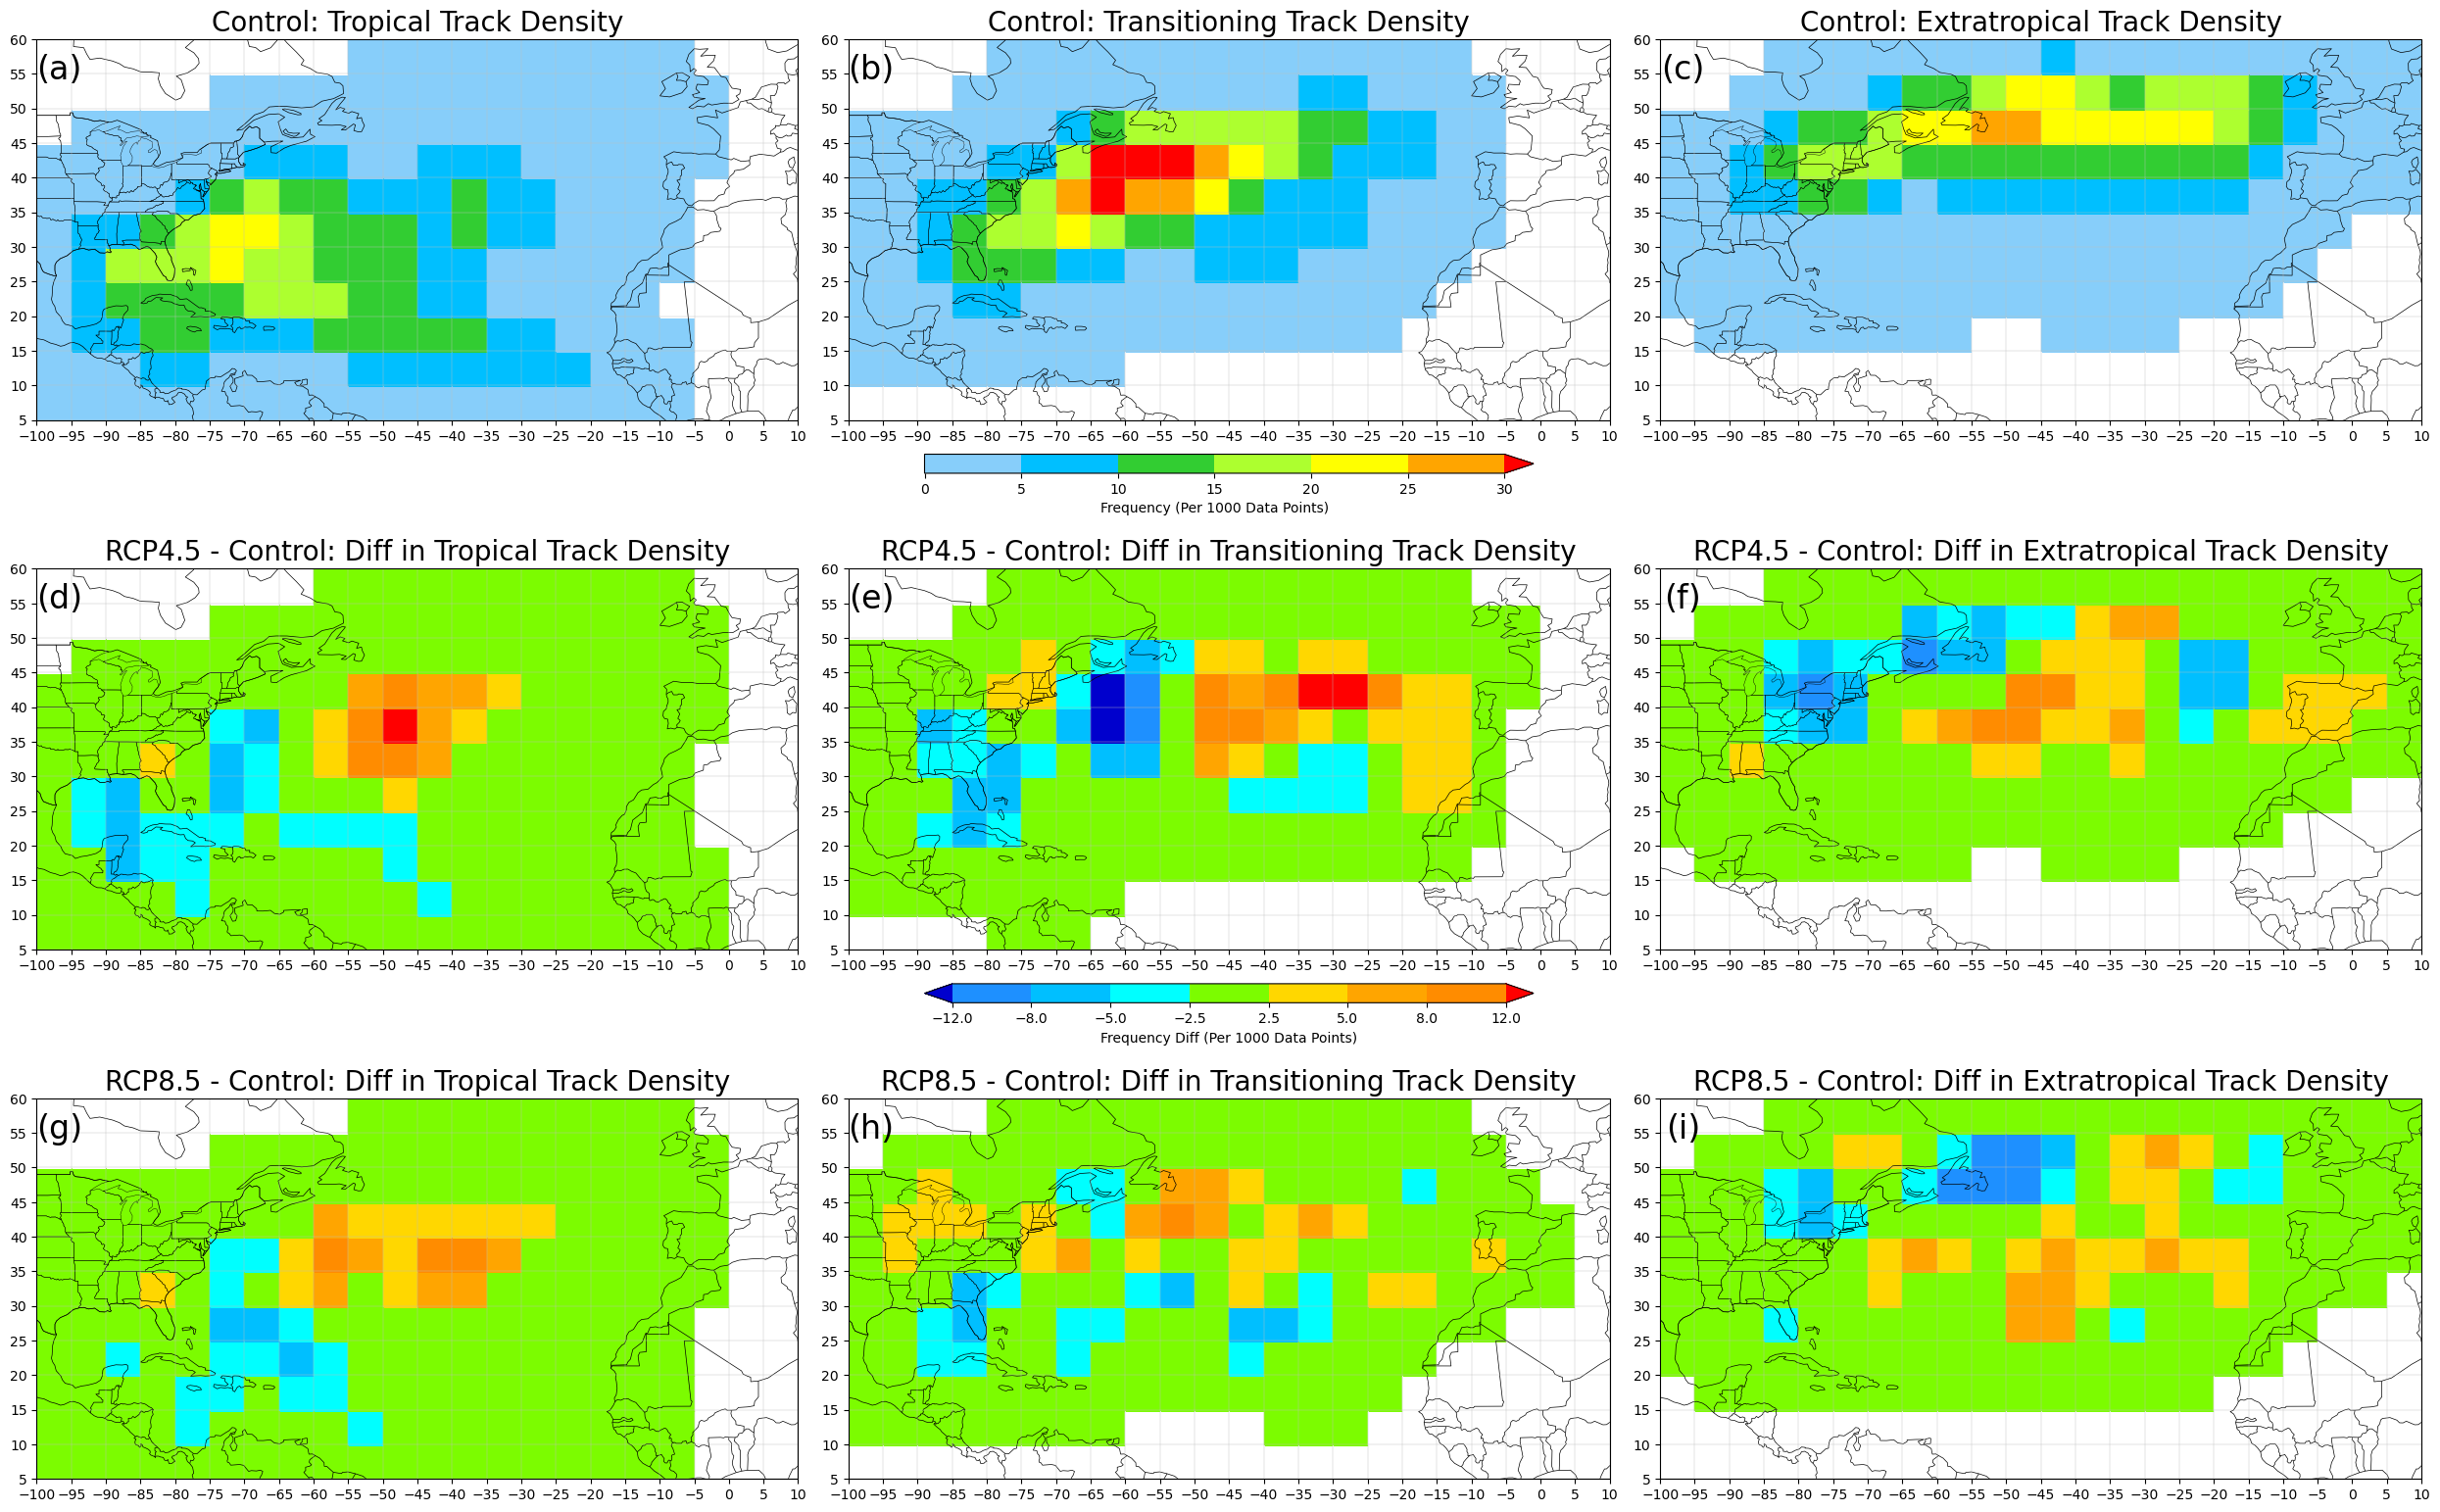

In [28]:
# Plot Differences Between Spatial Distributions By Storm Phase
Fig = pyplot.figure(figsize=(25,16))
Phase_Distr_Plot(Control_Data, "Control", 0, Spatial_Bounds, Spatial_Colours, True)
Phase_Diff_Plot(RCP45_Data, Control_Data, "RCP4.5", "Control", 1, Diff_Bounds, Diff_Colours, True)
Phase_Diff_Plot(RCP85_Data, Control_Data, "RCP8.5", "Control", 2, Diff_Bounds, Diff_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Phase_Diff.png', bbox_inches='tight')

In [29]:
Control_ET[Control_ET["Genesis SLP"] > 1003]

Code      Name ABC  Trans Type       ET Begin Time  \
0    TC190001      Alex   A           3 1900-07-03 18:00:00   
1    TC190003     Colin   A           1 1900-09-18 00:00:00   
2    TC190004      Dawn   A           1 1900-11-05 12:00:00   
4    TC190102  Harrison   A           1 1901-05-28 12:00:00   
5    TC190106     Mario   A           1 1901-09-22 00:00:00   
..        ...       ...  ..         ...                 ...   
277  TC198802     Micah   C           1 1988-02-06 00:00:00   
278  TC198805   Seldoen   C           1 1988-09-07 06:00:00   
279  TC198808     Alice   C           2 1988-09-12 06:00:00   
280  TC198809     Bruce   C           1 1988-09-21 06:00:00   
281  TC198902       Ivy   C           1 1989-09-27 00:00:00   

       ET Complete Time           Peak Time      Trop Peak Time  \
0   1900-07-03 18:00:00 1900-06-25 06:00:00 1900-06-25 06:00:00   
1   1900-09-20 12:00:00 1900-09-19 12:00:00 1900-09-15 18:00:00   
2   1900-11-06 12:00:00 1900-11-04 00:00:00 1900-11-04 00:00:00   
4   1901-05-30 18:00:00 1901-05-27 06:00:00 1901-05-27 06:00:00   
5   1901-09-22 18:00:00 1901-09-22 12:00:00 1901-09-21 18:00:00   
..                  ...                 ...                 ...   
277 1988-02-06 06:00:00 1988-02-05 06:00:00 1988-02-05 06:00:00   
278 1988-09-08 12:00:00 1988-09-07 00:00:00 1988-09-07 00:00:00   
279 1988-09-12 12:00:00 1988-09-13 06:00:00 1988-09-09 18:00:00   
280 1988-09-27 00:00:00 1988-09-22 00:00:00 1988-09-20 12:00:00   
281 1989-09-27 18:00:00 1989-09-19 18:00:00 1989-09-19 18:00:00   

           Genesis Time  Peak SLP  ...  Trop Peak Lat  ET Begin SLP  \
0   1900-06-19 12:00:00    987.41  ...          29.95       1015.57   
1   1900-09-09 18:00:00    934.83  ...          24.55        952.06   
2   1900-10-29 00:00:00    948.88  ...          20.70        954.74   
4   1901-05-23 00:00:00    980.89  ...          25.92        991.56   
5   1901-09-19 00:00:00    988.80  ...          34.42        993.69   
..                  ...       ...  ...            ...           ...   
277 1988-02-02 00:00:00    998.09  ...          36.46        999.63   
278 1988-08-29 06:00:00    980.43  ...          32.21        984.68   
279 1988-09-06 12:00:00    990.70  ...          35.61       1009.08   
280 1988-09-15 06:00:00    934.40  ...          28.60        961.07   
281 1989-09-12 12:00:00    953.02  ...          31.20       1000.11   

     ET Begin Lon  ET Begin Lat  ET Complete SLP  ET Complete Lon  \
0          -90.75         36.25          1015.57           -90.75   
1          -77.17         31.14           979.68           -62.68   
2          -87.08         27.00           992.74           -74.44   
4          -43.71         30.04          1008.78           -34.75   
5          -78.47         35.78           991.98           -71.20   
..            ...           ...              ...              ...   
277        -31.01         38.29           999.02           -28.74   
278        -48.37         33.35           987.91           -35.17   
279        -39.50         44.00          1008.35           -37.50   
280        -66.39         30.40          1001.36           -41.00   
281        -21.27         47.20          1007.69           -15.50   

     ET Complete Lat  Genesis SLP  Genesis Lon  Genesis Lat  
0              36.25      1015.45       -82.19        27.99  
1              47.61      1010.48       -32.20        12.39  
2              30.88      1005.24       -80.58        19.22  
4              24.00      1012.39       -52.94        22.04  
5              41.68      1008.51       -78.23        26.29  
..               ...          ...          ...          ...  
277            38.72      1011.83       -29.12        37.07  
278            42.45      1009.14       -22.53        13.12  
279            45.75      1005.74       -58.54        26.09  
280            47.00      1011.55       -65.65        26.61  
281            47.25      1009.12       -26.13        11.08  

[229 rows x 24 colum

In [30]:
RCP45_ET[RCP45_ET["Genesis SLP"] > 1003]

Code      Name ABC  Trans Type       ET Begin Time  \
3    TC200105   Brandon   A           1 2001-09-29 00:00:00   
6    TC200403      Andy   A           1 2004-05-08 18:00:00   
7    TC200503      Lily   A           1 2005-06-09 12:00:00   
8    TC200507   Shannon   A           2 2005-08-15 12:00:00   
9    TC200510       Ana   A           1 2005-09-09 12:00:00   
..        ...       ...  ..         ...                 ...   
184  TC209006     Hazel   C           2 2090-06-04 06:00:00   
185  TC209007    Joshua   C           1 2090-09-11 00:00:00   
187  TC209011     Nabil   C           1 2090-11-06 00:00:00   
188  TC209101  Rosalina   C           1 2091-01-14 00:00:00   
189  TC209105   Alberto   C           1 2091-09-06 00:00:00   

       ET Complete Time           Peak Time      Trop Peak Time  \
3   2001-09-29 12:00:00 2001-09-28 12:00:00 2001-09-28 12:00:00   
6   2004-05-10 12:00:00 2004-05-07 18:00:00 2004-05-07 18:00:00   
7   2005-06-11 00:00:00 2005-06-09 18:00:00 2005-06-09 06:00:00   
8   2005-08-15 18:00:00 2005-08-16 12:00:00 2005-08-13 06:00:00   
9   2005-09-11 06:00:00 2005-09-07 00:00:00 2005-09-07 00:00:00   
..                  ...                 ...                 ...   
184 2090-06-04 12:00:00 2090-05-31 18:00:00 2090-05-31 18:00:00   
185 2090-09-12 00:00:00 2090-09-05 18:00:00 2090-09-05 18:00:00   
187 2090-11-09 12:00:00 2090-11-08 18:00:00 2090-11-05 18:00:00   
188 2091-01-15 12:00:00 2091-01-15 06:00:00 2091-01-13 18:00:00   
189 2091-09-06 12:00:00 2091-09-02 06:00:00 2091-09-02 06:00:00   

           Genesis Time  Peak SLP  ...  Trop Peak Lat  ET Begin SLP  \
3   2001-09-17 00:00:00    928.97  ...          28.84        966.21   
6   2004-05-04 12:00:00    978.81  ...          33.18        979.32   
7   2005-06-05 18:00:00    973.25  ...          31.97        979.25   
8   2005-08-12 06:00:00    998.88  ...          34.50       1010.88   
9   2005-08-31 12:00:00    897.70  ...          23.57        933.51   
..                  ...       ...  ...            ...           ...   
184 2090-05-29 18:00:00    993.08  ...          20.71       1009.92   
185 2090-08-31 06:00:00    912.37  ...          29.96       1004.64   
187 2090-11-02 00:00:00    962.96  ...          36.87        994.31   
188 2091-01-11 18:00:00    963.38  ...          29.78        978.54   
189 2091-08-20 12:00:00    943.51  ...          37.79        996.84   

     ET Begin Lon  ET Begin Lat  ET Complete SLP  ET Complete Lon  \
3          -87.42         31.07           989.30           -86.53   
6          -42.93         35.03           986.81           -32.03   
7          -77.06         33.41          1000.72           -61.75   
8          -67.43         36.64          1006.79           -64.99   
9          -60.82         37.35           959.00           -43.52   
..            ...           ...              ...              ...   
184        -76.00         30.25          1011.93           -75.00   
185        -79.62         40.98          1000.14           -69.30   
187        -55.40         37.56           970.20           -20.27   
188        -56.81         31.00           968.11           -41.18   
189        -27.22         48.98          1005.89           -24.44   

     ET Complete Lat  Genesis SLP  Genesis Lon  Genesis Lat  
3              33.40      1009.10       -39.51         9.16  
6              47.16      1005.98       -57.65        23.11  
7              44.25      1010.55       -88.37        19.06  
8              37.94      1012.24       -78.52        32.36  
9              47.85      1010.30       -26.87        11.75  
..               ...          ...          ...          ...  
184            31.00      1004.86       -83.16        16.30  
185            45.29      1005.72       -66.20        20.99  
187            49.55      1013.12       -45.61        22.25  
188            49.59      1008.48       -58.25        22.56  
189            51.36      1006.44       -11.73         8.35  

[138 rows x 24 colum

In [31]:
RCP85_ET[RCP85_ET["Genesis SLP"] > 1003]

Code      Name ABC  Trans Type       ET Begin Time  \
1    TC210005    Ernest   A           2 2100-09-01 06:00:00   
2    TC210103     Lydia   A           1 2101-07-26 12:00:00   
3    TC210105    Nicole   A           1 2101-09-12 18:00:00   
4    TC210106      Phil   A           1 2101-09-22 18:00:00   
5    TC210107      Song   A           1 2101-10-21 00:00:00   
..        ...       ...  ..         ...                 ...   
193  TC219005     Ollie   C           1 2190-09-30 06:00:00   
194  TC219007    Sergio   C           1 2190-11-17 12:00:00   
195  TC219008      Tess   C           1 2190-11-17 06:00:00   
196  TC219102      Alex   C           1 2191-09-09 12:00:00   
197  TC219103  Beatrice   C           1 2191-09-14 00:00:00   

       ET Complete Time           Peak Time      Trop Peak Time  \
1   2100-09-01 12:00:00 2100-08-28 12:00:00 2100-08-28 12:00:00   
2   2101-07-28 00:00:00 2101-07-26 18:00:00 2101-07-26 06:00:00   
3   2101-09-14 18:00:00 2101-09-08 18:00:00 2101-09-08 18:00:00   
4   2101-09-23 18:00:00 2101-09-21 00:00:00 2101-09-21 00:00:00   
5   2101-10-22 12:00:00 2101-10-15 18:00:00 2101-10-15 18:00:00   
..                  ...                 ...                 ...   
193 2190-10-01 00:00:00 2190-09-19 06:00:00 2190-09-19 06:00:00   
194 2190-11-20 12:00:00 2190-11-13 12:00:00 2190-11-13 12:00:00   
195 2190-11-18 12:00:00 2190-11-13 06:00:00 2190-11-13 06:00:00   
196 2191-09-11 00:00:00 2191-09-09 18:00:00 2191-09-09 06:00:00   
197 2191-09-16 12:00:00 2191-09-14 06:00:00 2191-09-13 18:00:00   

           Genesis Time  Peak SLP  ...  Trop Peak Lat  ET Begin SLP  \
1   2100-08-21 00:00:00    968.16  ...          29.45       1003.30   
2   2101-07-20 18:00:00    971.18  ...          37.49        971.89   
3   2101-08-31 12:00:00    902.97  ...          23.01        934.13   
4   2101-09-14 12:00:00    987.95  ...          27.28        997.21   
5   2101-10-09 06:00:00    972.53  ...          34.56       1000.60   
..                  ...       ...  ...            ...           ...   
193 2190-09-10 00:00:00    923.97  ...          27.34       1003.13   
194 2190-11-03 18:00:00    900.04  ...          19.61        920.27   
195 2190-11-06 12:00:00    945.86  ...          33.12        978.43   
196 2191-08-28 06:00:00    920.35  ...          38.09        926.25   
197 2191-09-08 06:00:00    953.21  ...          31.46        964.10   

     ET Begin Lon  ET Begin Lat  ET Complete SLP  ET Complete Lon  \
1          -76.85         39.42          1001.84           -74.73   
2          -53.14         39.28           992.45           -37.66   
3          -60.07         35.72           962.56           -47.38   
4          -55.88         36.75          1001.49           -44.60   
5          -31.27         43.82          1009.88           -14.60   
..            ...           ...              ...              ...   
193        -29.92         43.14          1004.07           -26.48   
194        -80.08         21.68           981.25           -49.30   
195        -56.90         37.77           967.20           -29.04   
196        -59.21         40.19           984.72           -40.68   
197        -59.53         33.14          1000.29           -35.50   

     ET Complete Lat  Genesis SLP  Genesis Lon  Genesis Lat  
1              41.55      1012.88       -30.48        12.90  
2              46.61      1008.47       -78.85        25.82  
3              49.02      1010.22       -15.02         9.92  
4              45.12      1011.24       -33.54        11.82  
5              43.70      1012.10       -41.55        19.66  
..               ...          ...          ...          ...  
193            41.59      1004.04       -12.64         9.54  
194            41.08      1008.80       -78.14        15.51  
195            51.12      1006.92       -66.53        19.04  
196            50.61      1005.62       -25.41        13.87  
197            44.25      1010.96       -38.91        14.32  

[151 rows x 24 colum